### What is a filter?

<font size="3">
Filtering refers to transforming pixel intensity values to reveal certain image characteristics such as:

- <b>Enhancement:</b> This image characteristic improves contrast
- <b>Smoothing: </b>This image characteristic removes noise
- <b>Template matching:</b> This image characteristic detects known patterns
The filtered image is described by a discrete convolution and the filter is described by a n x n discrete convolution mask.</font>

### High-Pass Filter (HPF)

<font size="3">This filter allows only high frequencies from the frequency domain representation of the image (obtained with DFT) and blocks all low frequencies beyond a cut-off value. The image is reconstructed with inverse DFT, and since the high-frequency components correspond to edges, details, noise, and so on, HPFs tend to extract or enhance them</font>

### Low-pass filter (LPF)

<font size="3">This filter allows only the low frequencies from the frequency domain representation of the image (obtained with DFT), and blocks all high frequencies beyond a cut-off value. The image is reconstructed with inverse DFT, and since the high-frequency components correspond to edges, details, noise, and so on, LPF tends to remove these.</font>

### Band-pass filter (BPF) with DoG

<font size="3">The Difference of Gaussian (DoG) kernel can be used as a BPF to allow the frequencies in a certain band and discard all other frequencies. The following code block shows how the DoG kernel can be used with fftconvolve() to implement a BPF</font>

### Band-stop (notch) filter

<font size="3">This filter blocks/rejects a few chosen frequencies from the frequency domain representation of the image (obtained with DFT), and hence the name. It is useful for removing periodic noise from images.</font>

# Image filtering

- LinearFilter
- NonLinearFilter

## 2D Convolution ( Image Filtering )

<font size="3" color="green">As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.</font>

<font size="3">OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:</font>

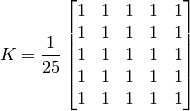

In [1]:
from IPython.display import Image
Image(filename='./images/input/filter.png',width=400)

Note:Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. This equates to computing the average of the pixel values inside that window. This operation is performed for all the pixels in the image to produce the output filtered image. Try this code and check the result:

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./images/input/img2.jpg')
kernel_averaging_5_5 = np.array([[0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04],[0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04]])

In [6]:
kernel_averaging_5_5 = np.ones((5, 5), np.float32) / 25

In [7]:
smooth_image_f2D = cv2.filter2D(image, -1, kernel_averaging_5_5)

In [8]:
cv2.imshow('input',smooth_image_f2D)
cv2.waitKey(0)

-1

## Image Blurring (Image Smoothing)

<font size="3" color="green">Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges).</font>

### Averaging

<font size="3"> This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of kernel.</font>

<font size="3" color='red'>Note:: If you don’t want to use a normalized box filter, use cv2.boxFilter() and pass the argument normalize=False to the function.</font>

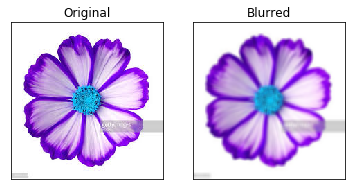

In [12]:
image=cv2.imread('./images/input/img3.jpg')
blur = cv2.blur(image,(5,5))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## BoxFilter
<b>Blurs an image using the box filter</b>

In [ ]:
import cv2
image = cv2.imread('./images/input/img2.jpg')
smooth_image_b = cv2.blur(image, (10, 10))
smooth_image_bfi = cv2.boxFilter(image, -1, (10, 10), normalize=True)

In [ ]:
cv2.imshow('input',smooth_image_bfi)
cv2.waitKey(0)

# Non-LinearFilter

### Gaussian Filtering

<font size="3">In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

<br>If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().</font>

In [15]:
blur_gaussian = cv2.GaussianBlur(image,(5,5),0)

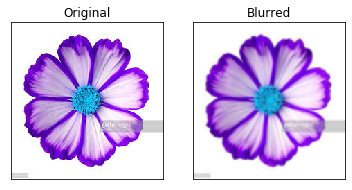

In [16]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur_gaussian),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Median Filtering

<font size="3">Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.<br>

In this demo, we add a 50% noise to our original image and use a median filter.</font>

In [20]:
image = cv2.imread('./images/input/img5.jpg')
median = cv2.medianBlur(image,5)

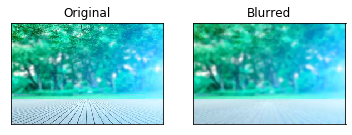

In [21]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Bilateral Filtering

<font size="3">As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter, cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.</font>

<font size="3">The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.
</font>


In [24]:
bilateral_blur = cv2.bilateralFilter(image,9,75,75)

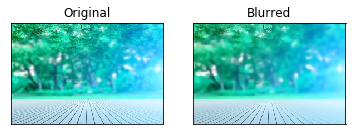

In [25]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bilateral_blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Image Processing

<font size ="3" color = "green">
Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image. These operations are particularly suited to the processing of binary images (where pixels are represented as 0 or 1 and, by convention, the foreground of the object = 1 or white and the background = 0 or black), although it can be extended to grayscale images.</font>

<font size ="3" color = "green">In morphological operations, a structuring element (a small template image) is used to probe the input image. The algorithms work by positioning the structuring element at all possible locations in the input image and comparing it with the corresponding neighborhood of the pixels with a set operator. Some operations test whether the element fits within the neighborhood, while others test whether it hits or intersects the neighborhood. A few popular morphological operators or filters are binary dilation and erosion, opening and closing, thinning, skeletonizing, morphological edge detectors, hit or miss filters, rank filters, median filters, and majority filters.</font>

<font size ="3" color = "deeppink">Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play</font>

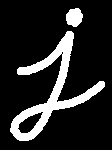

In [28]:
Image(filename='./images/input/mor.png')

### Erosion

<font size ="3">The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).</font>

<font size ="3">So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.</font>

In [36]:
import cv2
import numpy as np

img = cv2.imread('./images/input/mor.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

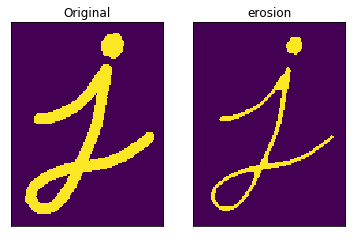

In [37]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

###  Dilation

<font size ="3">It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.</font>

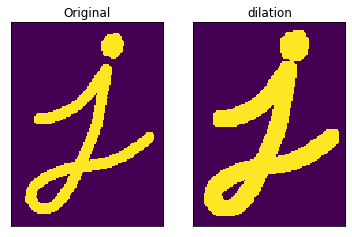

In [39]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

### Opening

<font size ="3">Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()</font>

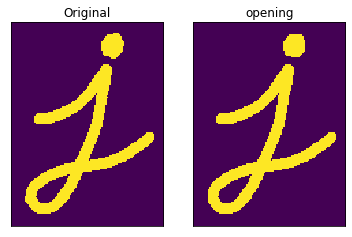

In [40]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

### Closing

<font size ="3">Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.</font>

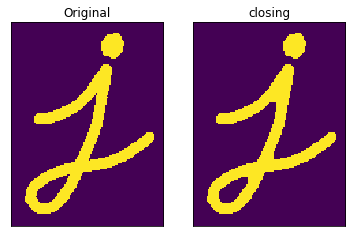

In [42]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

### Morphological Gradient

<font size="3">It is the difference between dilation and erosion of an image.<br>

The result will look like the outline of the object.</font>

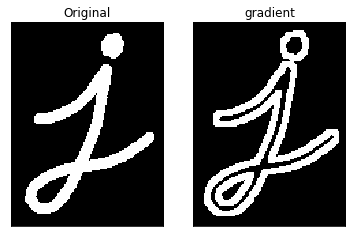

In [47]:
img = cv2.imread("./images/input/mor.png")
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

### Top Hat

<font size="3">It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.</font>

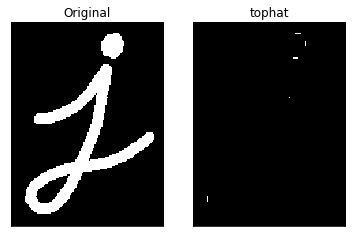

In [48]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat),plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

### Black Hat

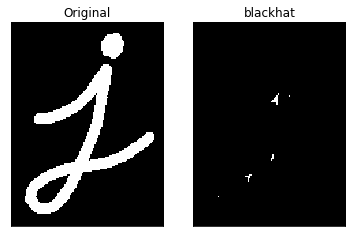

In [50]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat),plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

<font size="3" color="red">http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm</font>

### Skeletonizing

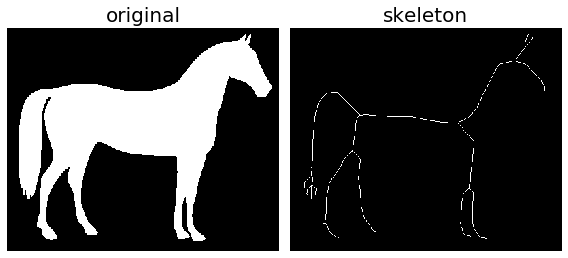

In [54]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

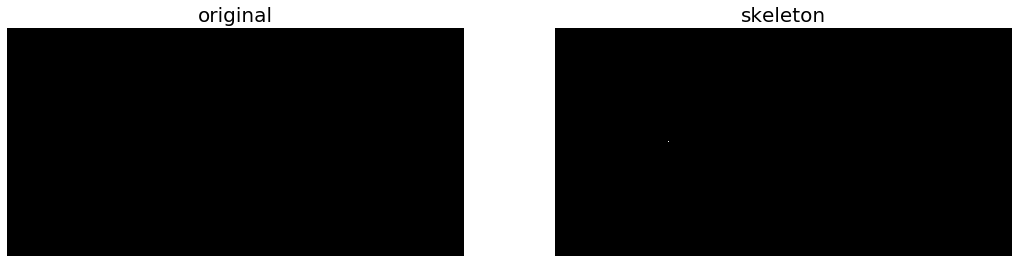

In [66]:
from skimage.util import img_as_float
from skimage.io import imread
from pylab import *
image ='./images/input/horse.png'
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

from skimage.morphology import skeletonize
im = img_as_float(imread('./images/input/horse.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

# Distance transform

<font size ="3" color = "green">The distance transform operator generally takes binary images as inputs. In this operation, the gray level intensities of the points inside the foreground regions are changed to distance their respective distances from the closest 0 value (boundary).</font>

<font size ="3" color = "green">Use the OpenCV function cv2.distanceTransform in order to obtain the derived representation of a binary image, where the value of each pixel is replaced by its distance to the nearest background pixel<br>

Calculates the distance to the closest zero pixel for each pixel of the source image.</font>

In [111]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('./images/input/img2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [112]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [113]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [114]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [115]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

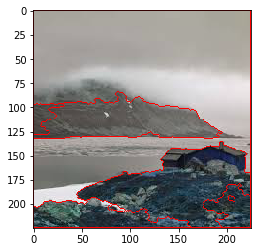

In [116]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)
plt.show()